<a href="https://colab.research.google.com/github/dlguswn3659/2020_Image_Lab/blob/master/hair_labeling/hair_labeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
pip install -q tensorflow-io

     |████████████████████████████████| 21.8MB 1.4MB/s 


In [6]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_io as tfio

In [7]:
!pip install -q pydicom

original image


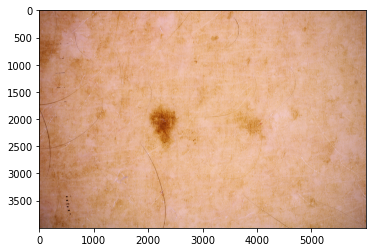

Image size.......: 4000 x 6000, 2367320 bytes
Slice location...: (missing)
file name :  ISIC_0015719


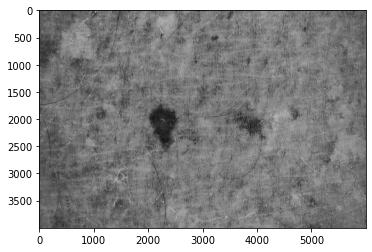

털의 유무 입력(0 : no hair | 1 : hair)1
original image


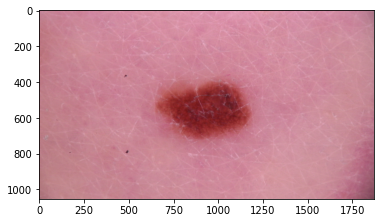

Image size.......: 1053 x 1872, 1466456 bytes
Slice location...: (missing)
file name :  ISIC_0052212


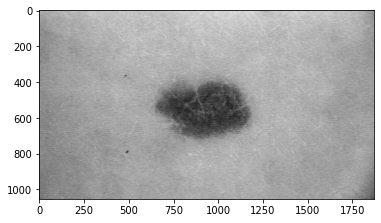

털의 유무 입력(0 : no hair | 1 : hair)0
original image


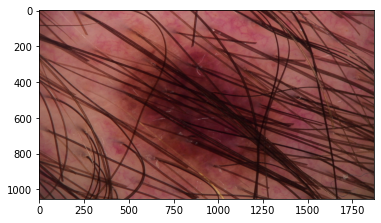

Image size.......: 1053 x 1872, 1286422 bytes
Slice location...: (missing)
file name :  ISIC_0068279


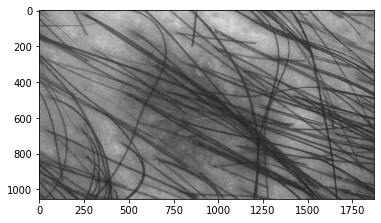

털의 유무 입력(0 : no hair | 1 : hair)1


In [8]:
# p = mdai_client.project('PVq9raBJ', path='/content/gdrive/My Drive/ISIC-melanoma/train/')
from PIL import Image
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
import pydicom
import matplotlib.pyplot as plt
from pydicom.data import get_testdata_files

# define location of dataset
folder = '/content/gdrive/My Drive/ISIC-melanoma/train/'
# plot first few images
hair_label = []
image_field = []

start_num = 10000
end_num = 70000

file_startname = 'ISIC_00'

if start_num >= 100000:
  file_startname = 'ISIC_0'
elif start_num >= 1000000:
  file_startname = 'ISIC_'

for i in range (start_num, end_num):
  if os.path.isfile(folder + file_startname + str(i) + '.dcm'):
    filename = folder + file_startname + str(i) + '.dcm'
    dataset = pydicom.dcmread(filename)

    image_bytes = tf.io.read_file(filename)

    image = tfio.image.decode_dicom_image(image_bytes, dtype=tf.uint16)

    skipped = tfio.image.decode_dicom_image(image_bytes, on_error='skip', dtype=tf.uint8)

    print("original image")
    plt.imshow(np.squeeze(image.numpy()))
    # plt.set_title('original image')
    plt.show()

    
    if 'PixelData' in dataset:
        rows = int(dataset.Rows)
        cols = int(dataset.Columns)
        print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
            rows=rows, cols=cols, size=len(dataset.PixelData)))
        if 'PixelSpacing' in dataset:
            print("Pixel spacing....:", dataset.PixelSpacing)

    # use .get() if not sure the item exists, and want a default value if missing
    print("Slice location...:", dataset.get('SliceLocation', "(missing)"))
    print("file name : ", file_startname + str(i))

    image = cv2.cvtColor(dataset.pixel_array, cv2.COLOR_BGR2GRAY)

    plt.imshow(image, cmap='gray')
    plt.show()

    label = input('털의 유무 입력(0 : no hair | 1 : hair)');
    hair_label.append(label)
    image_field.append(file_startname + str(i))



In [9]:
print(hair_label)
print(image_field)

['1', '0', '1']
['ISIC_0015719', 'ISIC_0052212', 'ISIC_0068279']


In [10]:
df1 = pd.DataFrame({"image_name" : image_field})
df2 = pd.DataFrame({"hair" : hair_label})

data = pd.merge(df1, df2, right_index=True, left_index=True)
data.to_csv(folder + "hair_labeling" + str(start_num) + "_" + str(end_num - 1)  + ".csv", header=True, index=False)

data

,image_name,hair
0,ISIC_0015719,1
1,ISIC_0052212,0
2,ISIC_0068279,1
